In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
cd ..

/home/jovyan/Project-Final


In [4]:
import lib.visuals as vs

In [5]:
%run src/load_data.py

In [6]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
listing_df                   DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[1437 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[1451 rows x 23 columns]
numeric_log_sc_df            DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
numeric_sc_df                DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
sale_df                      DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df     

In [10]:
numeric_df = housing_df.select_dtypes(exclude=['category']).copy()

In [11]:
categorical = housing_df.select_dtypes(include=['category']).copy()

In [12]:
categorical_df = pd.get_dummies(categorical, prefix_sep='_',)

In [14]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

df_gelman = apply_scale(numeric_df, gelman_scale)
df_standard = apply_scale(numeric_df, standard_scale)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [19]:
from sklearn.decomposition import PCA

In [20]:
features = ['GarageYrBlt','GrLivArea', 'GarageArea', 'TotalBsmtSF', 
            'YearBuilt', 'FirstFlrSF', 'LotFrontage','MasVnrArea']

In [21]:
merge = pd.merge(categorical_df, numeric_log_sc_df,left_index=True, right_index=True)

In [23]:
pca_original = PCA()
pca_gelman = PCA()
pca_standard = PCA()
pca_original.fit(merge[features])
pca_gelman.fit(df_gelman)
pca_standard.fit(df_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

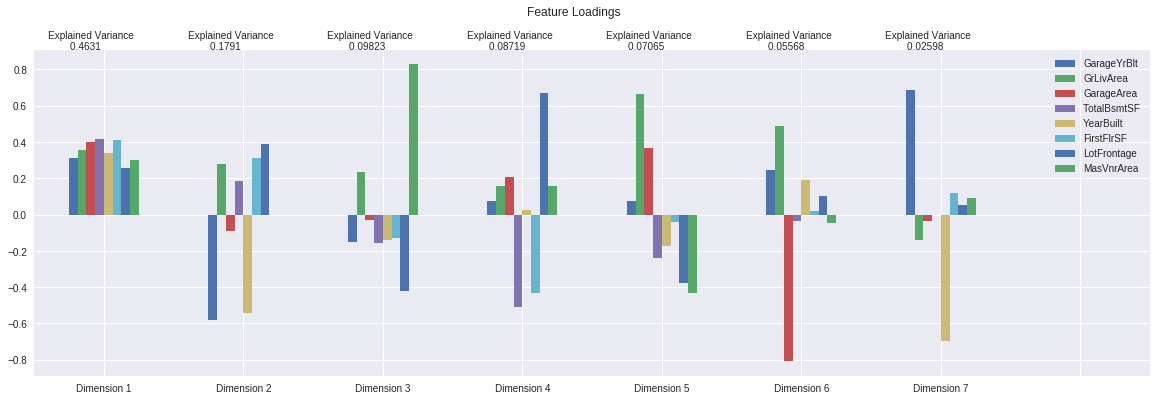

In [24]:
original_loading_plot = vs.FeatureLoadingsPlot(merge[features], pca_original,7)
original_loading_plot.display_segments()

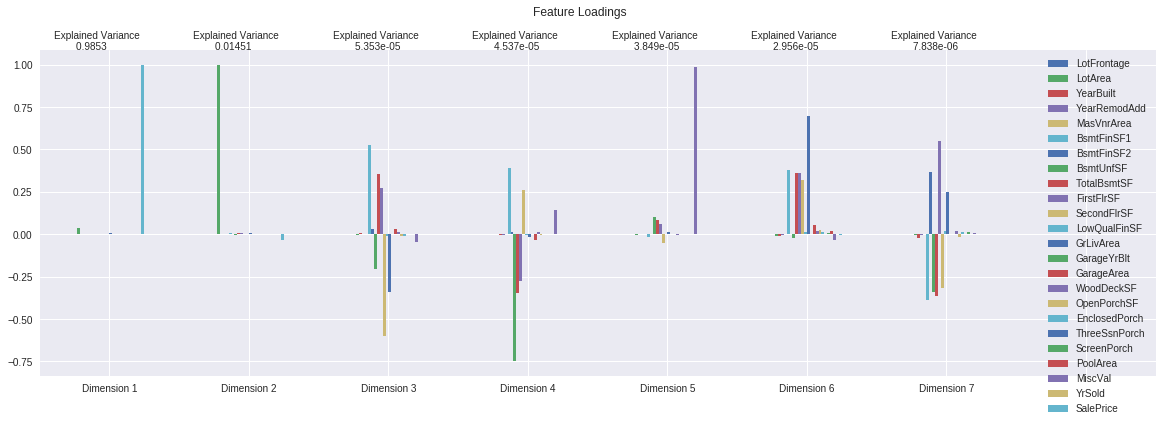

In [25]:
gelman_loading_plot = vs.FeatureLoadingsPlot(df_gelman, pca_gelman,7)
gelman_loading_plot.display_segments()

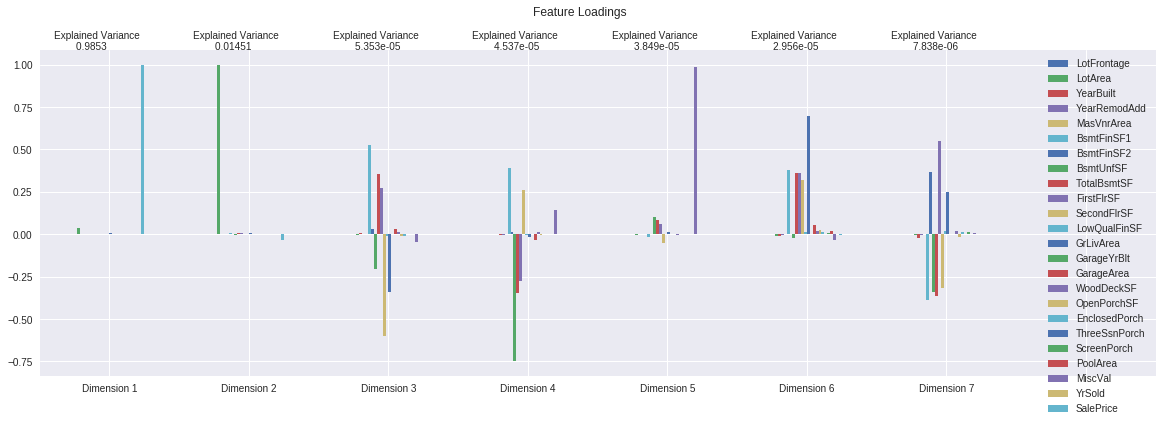

In [26]:
standard_loading_plot = vs.FeatureLoadingsPlot(df_standard, pca_standard,7)
standard_loading_plot.display_segments()

In [27]:
df_original_numerical = numeric_df.select_dtypes([float])
df_gelman_numerical = df_gelman.select_dtypes([float])
df_standard_numerical = df_standard.select_dtypes([float])

In [28]:
pca_original_numerical = PCA()
pca_gelman_numerical = PCA()
pca_standard_numerical = PCA()

In [30]:
pca_original_numerical.fit(df_original_numerical)
pca_gelman_numerical.fit(df_gelman_numerical)
pca_standard_numerical.fit(df_standard_numerical)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

ValueError: Precision not allowed in integer format specifier

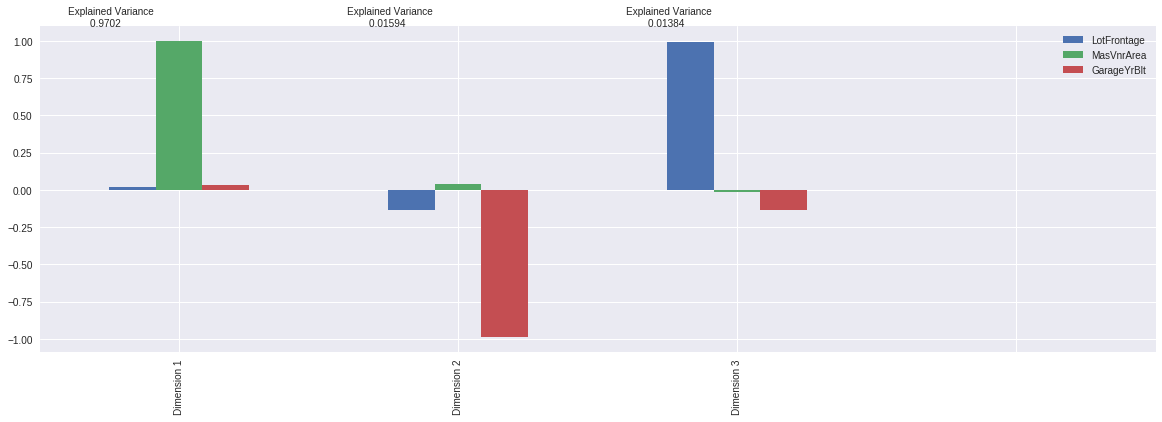

In [31]:
original_numerical_loadings = vs.FeatureLoadingsPlot(df_original_numerical, pca_original_numerical,4)
original_numerical_loadings.display_segments()

ValueError: Precision not allowed in integer format specifier

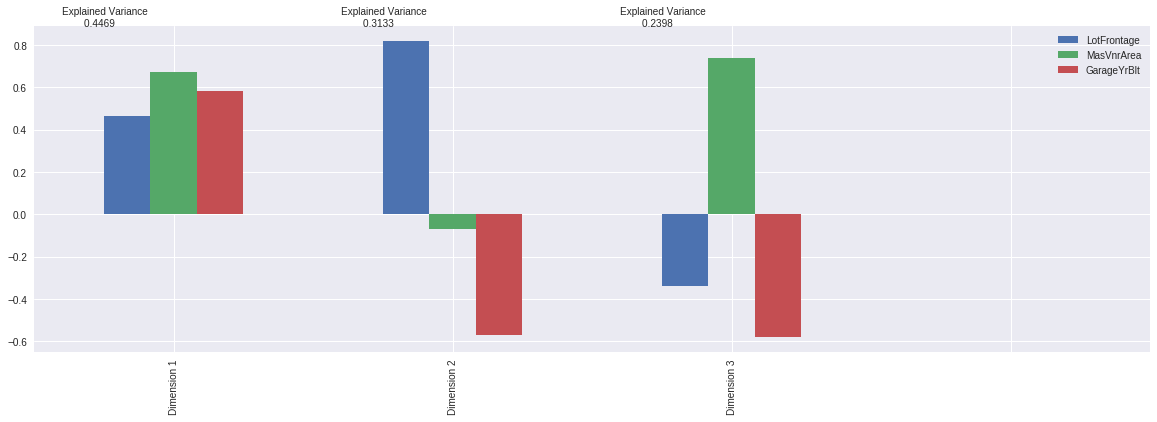

In [32]:
gelman_numerical_loadings = vs.FeatureLoadingsPlot(df_gelman_numerical, pca_gelman_numerical,4)
gelman_numerical_loadings.display_segments()

In [ ]:
standard_numerical_loadings = vs.FeatureLoadingsPlot(df_standard_numerical, pca_standard_numerical,4)
standard_numerical_loadings.display_segments()

In [33]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
Merge                        DataFrame          MSSubClass_20  MSSu<...>[1451 rows x 382 columns]
categorical                  DataFrame         MSSubClass MSZoning <...>n[1451 rows x 56 columns]
categorical_df               DataFrame          MSSubClass_20  MSSu<...>[1451 rows x 359 columns]
df_gelman                    DataFrame          LotFrontage  LotAre<...>n[1451 rows x 24 columns]
df_gelman_numerical          DataFrame          LotFrontage  MasVnr<...>\n[1451 rows x 3 columns]
df_original_numerical        DataFrame          LotFrontage  MasVnr<...>\n[1451 rows x 3 columns]
df_standard                  DataFrame          LotFrontage  LotAre<...>n[1451 rows x 24 columns]
df_standard_numerical        DataFrame          LotFrontage  MasVnr<...>\n[1451 rows x 3 columns]
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_oulier

In [34]:
whos PCA

Variable                 Type    Data/Info
------------------------------------------
pca_gelman               PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_gelman_numerical     PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_original             PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_original_numerical   PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_standard             PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_standard_numerical   PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)


In [36]:
dims_4 = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4']
dims_7 = dims_4 + ['Dimension 5', 'Dimension 6', 'Dimension 7']
df_original_pca = pd.DataFrame(pca_original.transform(numeric_df))
df_original_pca.columns = dims_7
df_original_numerical_pca = pd.DataFrame(pca_original_numerical.transform(df_original_numerical))
df_original_numerical_pca.columns = dims_4
df_gelman_pca = pd.DataFrame(pca_gelman.transform(df_gelman))
df_gelman_pca.columns = dims_7
df_gelman_numerical_pca = pd.DataFrame(pca_gelman_numerical.transform(df_gelman_numerical))
df_gelman_numerical_pca.columns = dims_4
df_standard_pca = pd.DataFrame(pca_standard.transform(df_standard))
df_standard_pca.columns = dims_7
df_standard_numerical_pca = pd.DataFrame(pca_standard_numerical.transform(df_standard_numerical))
df_standard_numerical_pca.columns = dims_4

ValueError: operands could not be broadcast together with shapes (1451,24) (8,) 

In [37]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
Merge                        DataFrame          MSSubClass_20  MSSu<...>[1451 rows x 382 columns]
categorical                  DataFrame         MSSubClass MSZoning <...>n[1451 rows x 56 columns]
categorical_df               DataFrame          MSSubClass_20  MSSu<...>[1451 rows x 359 columns]
df_gelman                    DataFrame          LotFrontage  LotAre<...>n[1451 rows x 24 columns]
df_gelman_numerical          DataFrame          LotFrontage  MasVnr<...>\n[1451 rows x 3 columns]
df_original_numerical        DataFrame          LotFrontage  MasVnr<...>\n[1451 rows x 3 columns]
df_standard                  DataFrame          LotFrontage  LotAre<...>n[1451 rows x 24 columns]
df_standard_numerical        DataFrame          LotFrontage  MasVnr<...>\n[1451 rows x 3 columns]
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_oulier

In [38]:
gelman_pca_clusters = vs.Clusters(df_gelman_pca, [2,3,4])
gelman_pca_clusters.cluster_plots()

NameError: name 'df_gelman_pca' is not defined

In [ ]:
standard_pca_clusters = vs.Clusters(df_standard_pca, [2,3,4])
standard_pca_clusters.cluster_plots()

In [ ]:
original_pca_clusters = vs.Clusters(df_original_pca, [2,3,4])
original_pca_clusters.cluster_plots()

In [ ]:
gelman_numerical_pca_clusters = vs.Clusters(df_gelman_numerical_pca, [2,3,4])
gelman_numerical_pca_clusters.cluster_plots()

In [ ]:
standard_numerical_pca_clusters = vs.Clusters(df_standard_numerical_pca, [2,3,4])
standard_numerical_pca_clusters.cluster_plots()


In [ ]:
original_numerical_pca_clusters = vs.Clusters(df_original_numerical_pca, [2,3,4])
original_numerical_pca_clusters.cluster_plots()